In [1]:
%matplotlib inline
import numpy as np
import bomeba0 as bmb
import matplotlib.pyplot as plt

The first thing we do to use bomeba is to create a protein object. We can do this by passing a sequence (using one-letter code). At the moment only the 20 most common amino-acids are accepted.

In [2]:
prot = bmb.Protein('GAG')

A protein object has several attributes for example we can retrieve the sequence

In [3]:
prot.sequence

'GAG'

or the cartesian coordinates as a (N, 3) numpy array

In [4]:
prot.coords

array([[-6.31387   ,  1.63056224, -2.10614436],
       [-4.86387   ,  1.72056224, -2.36614436],
       [-4.02387   ,  1.02056224, -1.31614436],
       [-4.19379942,  1.10890302, -0.1266403 ],
       [-6.48387   ,  1.10056224, -1.24614436],
       [-4.63387   ,  1.26056224, -3.32614436],
       [-4.55387   ,  2.77056224, -2.37614436],
       [-3.02673676,  0.25617351, -1.84711628],
       [-2.21065324, -0.4238961 , -0.82701187],
       [-0.72163533, -0.31997492, -1.11236438],
       [-0.21913606, -0.48652061, -2.20321589],
       [-2.63019998, -1.89860634, -0.7094949 ],
       [-2.68407767,  0.00706226, -2.77481684],
       [-2.36867485,  0.07153062,  0.13806924],
       [-3.70205873, -1.96595026, -0.46704157],
       [-2.45908074, -2.42312971, -1.64661466],
       [-2.06903575, -2.40560797,  0.07723507],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.44610297,  0.10092607, -0.27712837],
       [ 2.30368518, -0.59338659,  0.76238242],
       [ 1.87943295, -1.17717338,  1.727

We can also compute the energy of our protein. At the moment the energy is computed in vacuum, with a very simple force-field that only includes a Lenard-Jones term:

$$LJ_{ij} = \epsilon \left [ \left (\frac{\sigma_{ij}}{r_{ij}} \right)^{12}
     - 2 \left (\frac{\sigma_{ij}}{r_{ij}} \right)^{6} \right]$$

$\sigma_{ij}$ is the distance at which the potential reaches its minimum

$\epsilon_{ij}$ is the depth of the potential well

$r_{ij}$ is the distance between the atoms

Only five atoms types are considered (C, H, O, N, S), the parameters are loosely based on the general purpose force field GAFF

In [5]:
prot.energy()

29.368874398924792

We can also compute the radius of gyration, i.e. the root mean squared deviation of all atoms with respect to their common geometric center.

In [6]:
prot.rgyr()

3.1444028117154939

As with other Python object we can ask for the lenght of our protein. The answer we get is the number of amino acids.

In [7]:
len(prot)

3

We can ask for the coordinates of individuals atoms, we have to specify the residue number and a valid atom name. The atom name is optional is none is passed then we will get the coordinates of the residue, two other options are "bb" and "sc", for the backbone and sidechains coordinates respectively.

Let's not get the coordinates of the first two $\alpha$ carbons:

In [8]:
CA_0 = prot.at_coords(0, 'CA')
CA_1 = prot.at_coords(1, 'CA')

And we can use those coordinates to compute, for example, distances:

In [9]:
bmb.utils.dist(CA_0, CA_1)

3.742618012013873

We can ask for all the torsional angles in our molecule, at the moment this only works for $\phi$ and $\psi$ torsional angles, sidechain is comming soon!

In [10]:
prot.get_torsionals(sidechain=False)

,aa,phi,psi
0,G,NaN,135.0
1,A,-135.0,135.0
2,G,-135.0,NaN


and we can also change them!

In [11]:
prot.set_phi(1, -60)
prot.set_psi(1, -40)
prot.get_torsionals(sidechain=False)

,aa,phi,psi
0,G,NaN,135.0
1,A,-60.0,-40.0
2,G,-135.0,NaN


and we can plot a minimalistic (one-point) ramachadran!

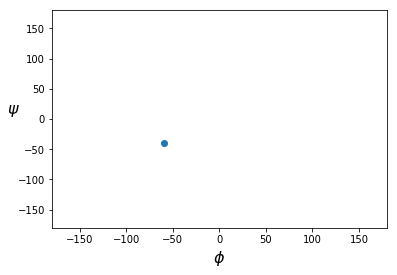

In [12]:
bmb.plot_ramachandran(prot);

We can also initialize a protein object from a pdb file at the moment

In [13]:
pdb = bmb.Protein(pdb='../pdbs/1ubq.pdb')
pdb

I am a protein

At the moment objects initilizased from pdbs have only a subset of features compared to those initialized from a sequence, this will be remeadiated in the near future. What features are not available? Basically computing the energy and setting torsional angles. All of the other features should work the same. For example retriving the coordinates or computing all $\phi, \psi$ torsionals.

In [14]:
pdb.coords

array([[ 27.34 ,  24.43 ,   2.614],
       [ 26.266,  25.413,   2.842],
       [ 26.913,  26.639,   3.531],
       ..., 
       [ 40.031,  39.992,  35.432],
       [ 38.933,  40.525,  35.687],
       [ 40.862,  39.575,  36.251]])

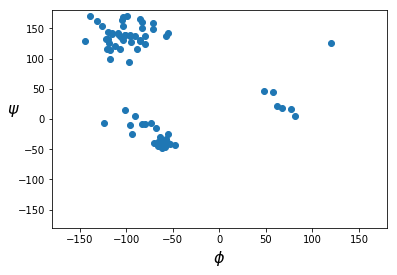

In [15]:
bmb.plot_ramachandran(pdb)

Bomeba allows us to retrive some of the information in the pdb files, like the b_factors. You can also compute the b_factors from a protein object initialized from a sequence but they will just a bunch os zeros.

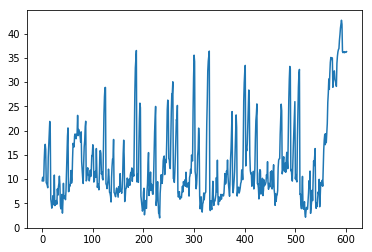

In [16]:
plt.plot(pdb.bfactors);

As with distances we can also compute angles and torsionals angles from arbitrary points. For example

In [17]:
a = pdb.at_coords(0, 'N')
b = pdb.at_coords(10, 'CA')
c = pdb.at_coords(20, 'O')
d = pdb.at_coords(30, 'N')
bmb.utils.get_torsional(a, b, c, d) * bmb.constants.radians_to_degrees

112.59343166554217

Notice that angles are returned in radians and we multiple the result by the constant `radians_to_degrees` to get the result in the _more familiar_ degrees.

Bomeba uses py3D mol to embed in the notebook visualization of molecules. This is a very early draft

In [18]:
pdb.view3d()